In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.zeros(3)
a

array([0., 0., 0.])

In [3]:
def moving_average(data, beta):
    """placeholder documentation"""
    mov_avg = np.zeros(len(data))
    mov_avg[0] = data[0]

    for i in range(1, len(data)):
        mov_avg[i] = (beta * data[i]) +\
                     ((1 - beta) * mov_avg[i - 1])
        #the following line is bias correction
        mov_avg[i] = mov_avg[i] / (1 - beta**(i + 1))
    return mov_avg



In [7]:
def main4():
  data = [72, 78, 71, 68, 66, 69, 79, 79, 65, 64, 66, 78, 64, 64, 81, 71, 69,
                65, 72, 64, 60, 61, 62, 66, 72, 72, 67, 67, 67, 68, 75]
  days = list(range(1, len(data) + 1))
  m_avg = moving_average(data, 0.9)
  print(m_avg)
  plt.plot(days, data, 'r', days, m_avg, 'b')
  plt.xlabel('Day of Month')
  plt.ylabel('Temperature (Fahrenheit)')
  plt.title('SF Maximum Temperatures in October 2018')
  plt.legend(['actual', 'moving_average'])
  plt.show()

[ 72.         410.52631579 261.99261993 197.73189881 161.16822544
 147.26000354 151.42712397 138.71018734 106.1086746   98.2617557
  96.18335641 108.70012628  85.81234733  82.98410042 102.00112765
  87.14885963  82.81044906  76.47910309  83.24519091  72.85780863
  67.37174863  67.66328326  68.02940404  71.72092356  77.56864381
  76.97337777  71.13721324  70.70643451  70.37505569  71.64929668
  84.99264292]


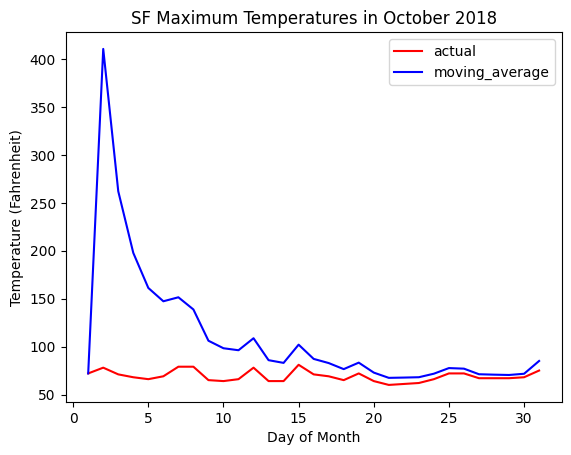

In [12]:
def moving_average(data, beta):
    """calculates the exponential moving average
    of datalist data.
    beta = weight
        this is represented as 'alpha' or 'α' by some.
    """
    n = len(data)
    mov_avg = np.zeros(n)
    mov_avg[0] = data[0]

    for k in range(1, n):
        mov_avg[k] = ((1 - beta) ** (n - k)) *\
                     (beta * data[k]) + data[n - 1]
        # the following line is bias correction
        mov_avg[k] = mov_avg[k] / (1 - beta ** (k + 1))
    return mov_avg

main4()

[ 72.         720.         410.52631579 261.99261993 197.73189881
 161.16822544 147.26000354 151.42712397 138.71018734 106.1086746
  98.2617557   96.18335641 108.70012628  85.81234733  82.98410042
 102.00112765  87.14885963  82.81044906  76.47910309  83.24519091
  72.85780863  67.37174863  67.66328326  68.02940404  71.72092356
  77.56864381  76.97337777  71.13721324  70.70643451  70.37505569
  71.64929668]


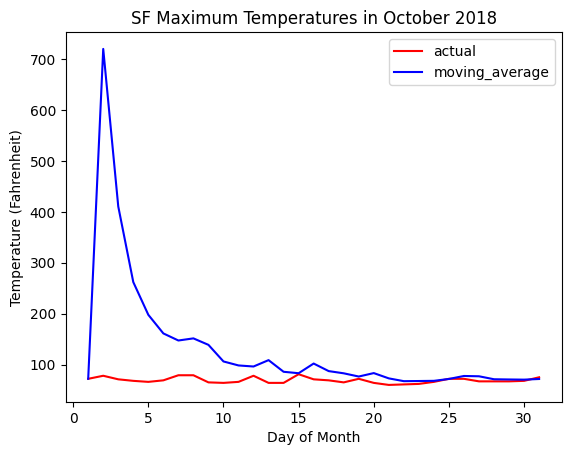

In [13]:
def moving_average(data, beta):
    """calculates the exponential moving average
    of datalist data.
    beta = weight
        this is represented as 'alpha' or 'α' by some.
    """
    n = len(data)
    mov_avg = np.zeros(n)
    mov_avg[0] = data[0]

    for k in range(0, n - 1):
        mov_avg[k + 1] = ((1 - beta) ** (n - k)) *\
                     (beta * data[k]) + data[k]
        # the following line is bias correction
        mov_avg[k + 1] = mov_avg[k + 1] / (1 - beta ** (k + 1))
    return mov_avg

main4()

[394.73684211 276.75276753 218.0866531  183.14571073 160.06522124
 143.75992782 131.68688672 122.43308608 115.15049496 109.29926865
 104.51935219 100.56134453  97.24699269  94.44548856  92.05865454
  90.01135767  88.24511894  86.71374053  85.38024449  84.21468579
  83.19256138  82.29363391  81.50104941  80.80067034  80.18059896
  79.63113241  79.1482341   78.77049153  78.9591707   84.99264292
   0.        ]


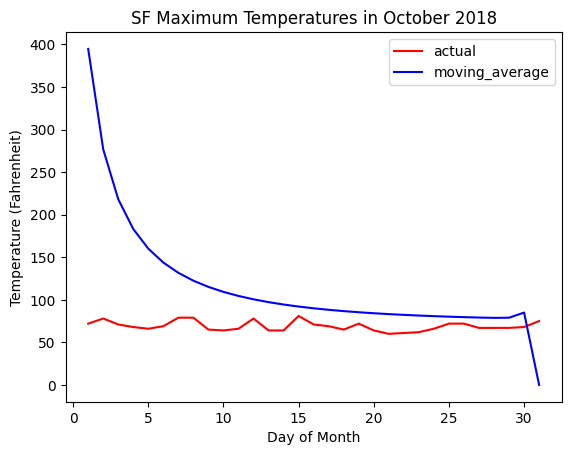

In [14]:
def moving_average(data, beta):
    """calculates the exponential moving average
    of datalist data.
    beta = weight
        this is represented as 'alpha' or 'α' by some.
    """
    n = len(data)
    mov_avg = np.zeros(n + 1)
    mov_avg[1] = data[0]

    for k in range(1, n):
        mov_avg[k] = ((1 - beta) ** (n - k)) *\
                     (beta * data[k]) + data[n - 1]
        # the following line is bias correction
        mov_avg[k] = mov_avg[k] / (1 - beta ** (k + 1))
    return mov_avg[1:]

main4()

[72.         75.15789474 73.62361624 71.98836871 70.52604332 70.2003547
 71.88706987 73.13597603 71.80782583 70.60905915 69.93737009 71.06097123
 70.11422355 69.32143708 70.79208719 70.81760742 70.599467   69.94063283
 70.1787334  69.47534438 68.41139351 67.58929643 66.97601175 66.86995044
 67.42263232 67.91198667 67.81515741 67.72913996 67.65262187 67.68889744
 68.44900745]


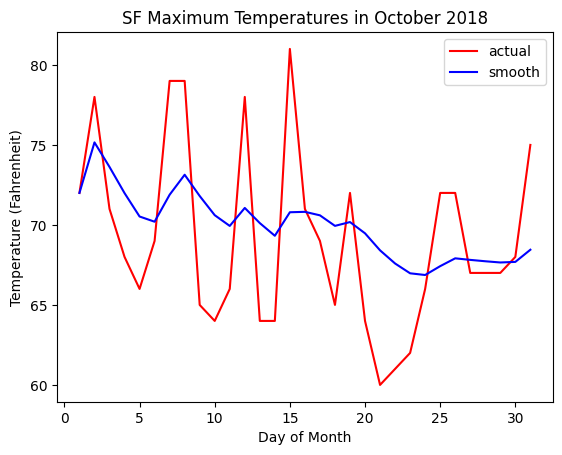

In [15]:
def smooth(x, b=0.98):
  '''Compute the exponential weighted average: b*avg[i-1] + (1-b)*x[i].
     The sum of the geometric sequence is 1-b^(i+1).
  '''
  avg=0.0                     # set initial condition
  smooth=[]
  for i in range(len(x)):
    EMA = b * avg + (1-b) * x[i]
    smooth.append(EMA / (1-b**(i+1)))
    avg=EMA
  return np.array(smooth)

def main4smooth():
  data = [72, 78, 71, 68, 66, 69, 79, 79, 65, 64, 66, 78, 64, 64, 81, 71, 69,
                65, 72, 64, 60, 61, 62, 66, 72, 72, 67, 67, 67, 68, 75]
  days = list(range(1, len(data) + 1))
  m_avg = smooth(data, 0.9)
  print(m_avg)
  plt.plot(days, data, 'r', days, m_avg, 'b')
  plt.xlabel('Day of Month')
  plt.ylabel('Temperature (Fahrenheit)')
  plt.title('SF Maximum Temperatures in October 2018')
  plt.legend(['actual', 'smooth'])
  plt.show()

main4smooth()

[72.0, 75.15789473684211, 73.62361623616238, 71.98836871183484, 70.52604332006544, 70.20035470453027, 71.88706986789997, 73.13597603396988, 71.80782582850702, 70.60905915023126, 69.93737009120935, 71.0609712312634, 70.11422355031073, 69.32143707981284, 70.79208718739721, 70.81760741911772, 70.59946700377961, 69.9406328280786, 70.17873340222755, 69.47534437750306, 68.41139351151023, 67.58929643210207, 66.97601174673004, 66.86995043877324, 67.42263231561797, 67.91198666959514, 67.8151574064495, 67.72913996327617, 67.65262186609462, 67.68889744321645, 68.44900744806469]


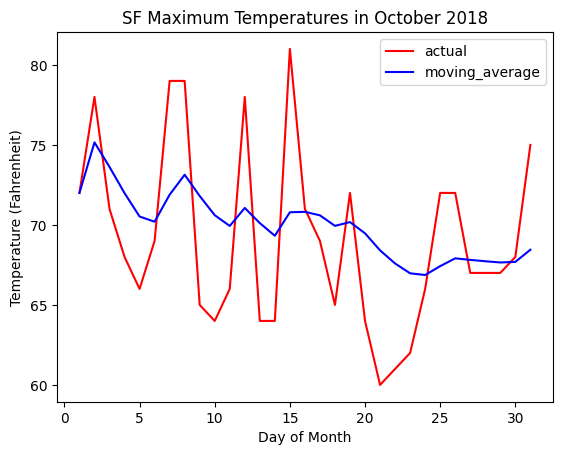

In [20]:
def moving_average(data, beta):
    """calculates the exponential moving average
    of datalist data.
    beta = weight
        this is represented as 'alpha' or 'α' by some.
    """
    n = len(data)
    avg = 0.0
    mov_avg = []

    for k in range(0, n):
      EMA = beta * avg + (1-beta) * data[k]
      mov_avg.append(EMA / (1-beta**(k+1)))
        # the following line is bias correction
      avg = EMA
    return mov_avg

main4()